# Particle movement in a simple model of a tokamak

In [1]:
from plasmapy import simulation
from plasmapy.classes.sources import Coils
import astropy.units as u
import numpy as np
radius = 0.5 * u.m
minor_radius = 0.3 * u.m
main_current = 4 * u.kA
n_coils = 8
currents = n_coils * [4 * u.kA]
coils = Coils.toykamak(minor_radius, radius, main_current, currents)

x = u.Quantity([[0.6, 0, 0]],  u.m)
v = u.Quantity([[0, 300, 0]], u.m / u.s)

initial_condition = simulation.ParticleTracker(coils, x, v, 'p',)
initial_condition

ParticleTracker(plasma=Coils(9 x CircularWire(4000.0 A)), particle_type=p+, N = 1)

We intend to keep a list of available solvers in `ParticleTracker.integrators` and, for the brave, in `ParticleTracker._wip_integrators`. They have varying levels of usefulness and especially stability right now:

In [2]:
solutions = {}
for name, integrator in simulation.ParticleTracker._all_integrators.items(): # _all_integrators has both kinds
    print(name)
    solutions[name] = solution = initial_condition.run(1e-1 * u.s, 1e-6 * u.s, pusher=name)

explicit_boris



zenitani


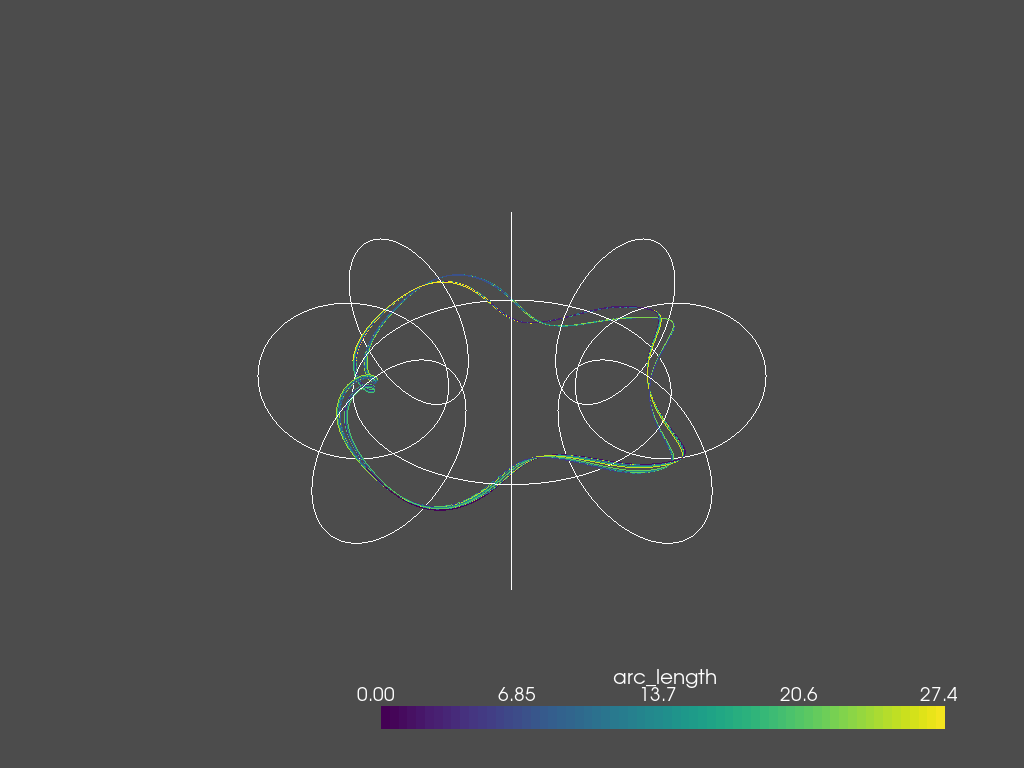

In [11]:
import pyvista as pv
fig = pv.Plotter()
coils.visualize(fig)
for name, solution in solutions.items():
    solution.particletracker.visualize(fig,
                                       name=name
                                      )
# fig.add_legend()
fig.show()